In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]])

In [16]:
# Standardize the data by subtracting the mean and dividing by the standard deviation.
# This results in a new array 'df1' with zero mean and unit variance.
df1 = (df - df.mean()) / df.std()

In [17]:
# Calculate the covariance matrix of the standardized data 'df1'.
# The transpose (.T) is used because np.cov expects variables as rows by default.
cov = np.cov(df1.T)

In [18]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix.
# eig_v contains the eigenvalues, and eig_vec contains the corresponding eigenvectors.
eig_v, eig_vec = np.linalg.eig(cov)

In [19]:
# Sort the eigenvalues in descending order and rearrange the eigenvectors
# accordingly. This is done to identify the principal components in order
# of their explained variance.
sorted = np.argsort(eig_v)[::-1]
eig_v = eig_v[sorted]
eig_vec = eig_vec[:, sorted]

In [20]:
# Select the first two eigenvectors (corresponding to the two largest eigenvalues)
# to form the subspace for dimensionality reduction.
eig_vec_sub = eig_vec[:, :2]

In [23]:
# Project the standardized data onto the subspace spanned by the top 2 eigenvectors.
# This performs the dimensionality reduction, creating the 'reduced' data.
reduced = df1.dot(eig_vec_sub)
# Create a pandas DataFrame from the reduced data with column names 'PC1' and 'PC2'.
red_df = pd.DataFrame(reduced, columns=['PC1', 'PC2'])

In [24]:
# Print the resulting DataFrame containing the 2D PCA projection.
print(red_df)

        PC1       PC2
0  1.221040  0.402793
1 -2.135781 -0.063562
2  1.507634 -0.294226
3  0.554877 -0.003403
4  2.418709  0.416297
5  1.469286 -0.083515
6  0.035763  0.572824
7 -1.380533  0.104747
8 -0.390932  0.120529
9 -1.571094  0.396987


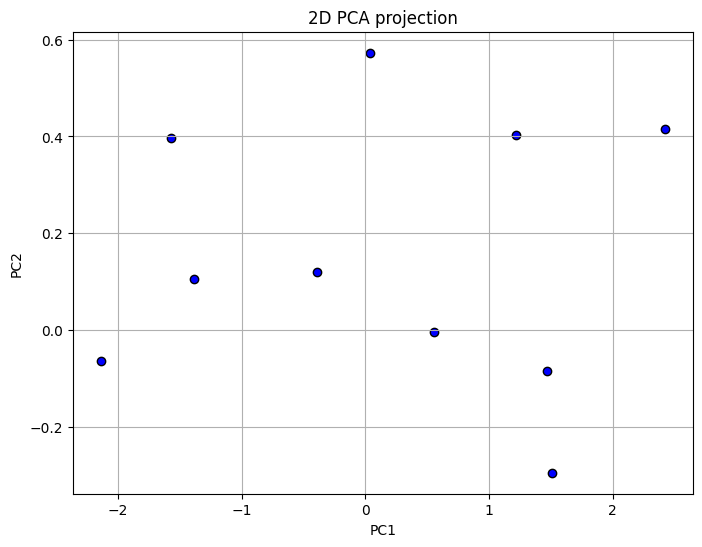

In [27]:
# Create a figure and axes for the plot.
plt.figure(figsize=(8, 6))
# Create a scatter plot of the reduced data, showing PC1 on the x-axis and PC2 on the y-axis.
# The points are colored blue with a black edge.
plt.scatter(red_df['PC1'], red_df['PC2'], color = 'blue', edgecolor = 'k')
# Set the title of the plot.
plt.title('2D PCA projection')
# Set the label for the x-axis.
plt.xlabel('PC1')
# Set the label for the y-axis.
plt.ylabel('PC2')
# Add a grid to the plot for better readability.
plt.grid(True)
# Display the plot.
plt.show()